In [43]:
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit import QuantumCircuit, execute, Aer
from qiskit.visualization import plot_histogram
from math import sqrt
# qiskit-ibmq-provider has been deprecated.
# Please see the Migration Guides in https://ibm.biz/provider_migration_guide for more detail.
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler, Estimator, Session, Options

# Loading your IBM Quantum account(s)
service = QiskitRuntimeService(channel="ibm_quantum")

from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, Aer
# Invoke a primitive. For more details see https://qiskit.org/documentation/partners/qiskit_ibm_runtime/tutorials.html
# result = Sampler("ibmq_qasm_simulator").run(circuits).result()
N=8000

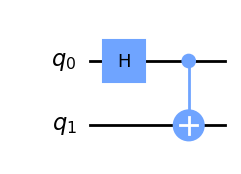

In [44]:
## Creating a gate that creats a bell state
# Create a quantum circuit with two qubits
bell_circuit = QuantumCircuit(2)


bell_circuit.h(0) # Apply a Hadamard gate to the first qubit (creates a Bell state)
bell_circuit.cx(0, 1)  # Apply a CNOT gate to create an entangled state

bc=bell_circuit.to_gate(label="Bell Circuit")
bell_circuit.draw()

In [45]:
## The unitary that changes the basis from (X+Z)/sqrt(2) to standard basis
from qiskit.quantum_info.operators import Operator
from qiskit.extensions import UnitaryGate
U0=UnitaryGate(
    Operator([[(1-sqrt(2))/sqrt(4-2*sqrt(2)),(1+sqrt(2))/sqrt(4+2*sqrt(2))],
              [1/sqrt(4-2*sqrt(2)),1/sqrt(4+2*sqrt(2))]]), label="U0")
U1=UnitaryGate(
    Operator([[(-1-sqrt(2))/sqrt(4+2*sqrt(2)),(-1+sqrt(2))/sqrt(4-2*sqrt(2))],
              [1/sqrt(4+2*sqrt(2)),1/sqrt(4-2*sqrt(2))]]), label="U1")
## The unitary that changes the basis from (X-Z)/sqrt(2) to standard basis

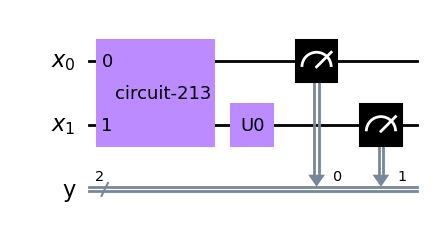

In [46]:
## To calculate P(ab/xy=00) we measure Alice's qubit on Z basis and Bob's qubit on (X+Z)/sqrt(2) basis
q = QuantumRegister(2, name="x")

# Allocating 2 bits
c = ClassicalRegister(2, name="y")

# We build a quantum circuit with both registers.
# By default, everything is initialized to 0 and to |0>
qc = QuantumCircuit(q,c)
qc.append(bell_circuit,[q[0], q[1]])

qc.append(U0,[q[1]])
# Mesure of all of register q, storing results in c.
# This is still part of the circuit
qc.measure(q, c)
#qc.save_density_matrix(qubits=[0, 1], label="rho", conditional=True)
qc.draw()



In [47]:
from qiskit import BasicAer, execute
# To run the circuit, we initialize a backend
backend = BasicAer.get_backend('qasm_simulator')

# Then performs several runs of the circuit using this backend. Here we ask for 1024 runs.
job = execute(qc, backend, shots=N)

# To retrieve the results -- note how we only get values for the single bit-register
res = dict(job.result().get_counts(qc))

res
counts = job.result().get_counts()
total_shots = sum(counts.values())  # Calculate the total number of shots

# Initialize a dictionary to store the probabilities
P00 = {}

# Calculate the probability for each outcome
for outcome, count in counts.items():
    probability = count / total_shots
    P00[outcome] = probability
P00

## "P(-1-1/00)","P(-11/00)","P(1-1/00)","P(11/00)"

{'01': 0.416625, '00': 0.076125, '11': 0.07225, '10': 0.435}

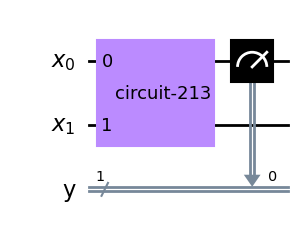

In [48]:
## To calculate P(a/0) we measure Alice's qubit on Z basis
q = QuantumRegister(2, name="x")

# Allocating 2 bits
c = ClassicalRegister(1, name="y")

# We build a quantum circuit with both registers.
# By default, everything is initialized to 0 and to |0>
qc = QuantumCircuit(q,c)
qc.append(bell_circuit,[q[0], q[1]])

##qc.append(U0,[q[1]])
# Mesure of all of register q, storing results in c.
# This is still part of the circuit
qc.measure(q[0], c[0])
qc.draw()



In [49]:
from qiskit import BasicAer, execute
# To run the circuit, we initialize a backend
backend = BasicAer.get_backend('qasm_simulator')

# Then performs several runs of the circuit using this backend. Here we ask for 1024 runs.
job = execute(qc, backend, shots=N)

# To retrieve the results -- note how we only get values for the single bit-register
res = dict(job.result().get_counts(qc))

res
counts = job.result().get_counts()
total_shots = sum(counts.values())  # Calculate the total number of shots

# Initialize a dictionary to store the probabilities
Pa0 = {}

# Calculate the probability for each outcome
for outcome, count in counts.items():
    probability = count / total_shots
    Pa0[outcome] = probability
Pa0

{'1': 0.49475, '0': 0.50525}

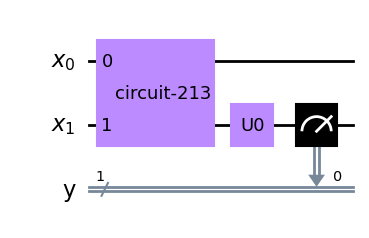

In [50]:
## To calculate P(b/0) we measure Bob's qubit on Z+X/sqrt(2) basis
q = QuantumRegister(2, name="x")

# Allocating 2 bits
c = ClassicalRegister(1, name="y")

# We build a quantum circuit with both registers.
# By default, everything is initialized to 0 and to |0>
qc = QuantumCircuit(q,c)
qc.append(bell_circuit,[q[0], q[1]])

qc.append(U0,[q[1]])
# Mesure of all of register q, storing results in c.
# This is still part of the circuit
qc.measure(1, 0)
qc.draw()

In [51]:
from qiskit import BasicAer, execute
# To run the circuit, we initialize a backend
backend = BasicAer.get_backend('qasm_simulator')

# Then performs several runs of the circuit using this backend. Here we ask for 1024 runs.
job = execute(qc, backend, shots=N)

# To retrieve the results -- note how we only get values for the single bit-register
res = dict(job.result().get_counts(qc))

res
counts = job.result().get_counts()
total_shots = sum(counts.values())  # Calculate the total number of shots

# Initialize a dictionary to store the probabilities
Pb0 = {}

# Calculate the probability for each outcome
for outcome, count in counts.items():
    probability = count / total_shots
    Pb0[outcome] = probability
Pb0

{'0': 0.49625, '1': 0.50375}

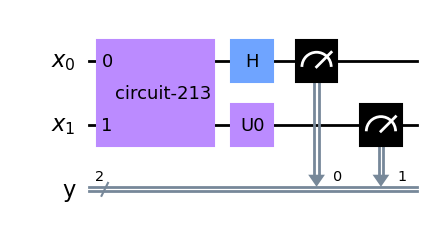

In [52]:
## To calculate P(ab/xy=10) we measure Alice's qubit on X basis and Bob's qubit on (X+Z)/sqrt(2) basis
q = QuantumRegister(2, name="x")

# Allocating 2 bits
c = ClassicalRegister(2, name="y")

# We build a quantum circuit with both registers.
# By default, everything is initialized to 0 and to |0>
qc = QuantumCircuit(q,c)
qc.append(bell_circuit,[q[0], q[1]])
qc.h(0)
qc.append(U0,[q[1]])
# Mesure of all of register q, storing results in c.
# This is still part of the circuit
qc.measure(q, c)
qc.draw()

In [53]:
from qiskit import BasicAer, execute
# To run the circuit, we initialize a backend
backend = BasicAer.get_backend('qasm_simulator')

# Then performs several runs of the circuit using this backend. Here we ask for 1024 runs.
job = execute(qc, backend, shots=N)

# To retrieve the results -- note how we only get values for the single bit-register
res = dict(job.result().get_counts(qc))

res
counts = job.result().get_counts()
total_shots = sum(counts.values())  # Calculate the total number of shots

# Initialize a dictionary to store the probabilities
P10 = {}

# Calculate the probability for each outcome
for outcome, count in counts.items():
    probability = count / total_shots
    P10[outcome] = probability
P10



{'10': 0.421625, '01': 0.4265, '11': 0.075125, '00': 0.07675}

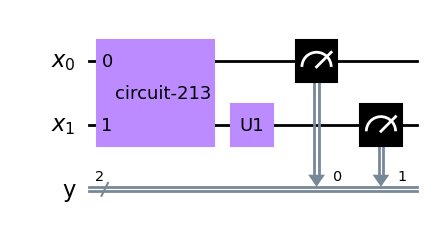

In [54]:
## To calculate P(ab/xy=01) we measure Alice's qubit on Z basis and Bob's qubit on (X-Z)/sqrt(2) basis
q = QuantumRegister(2, name="x")

# Allocating 2 bits
c = ClassicalRegister(2, name="y")

# We build a quantum circuit with both registers.
# By default, everything is initialized to 0 and to |0>
qc = QuantumCircuit(q,c)
qc.append(bell_circuit,[q[0], q[1]])

qc.append(U1,[q[1]])
# Mesure of all of register q, storing results in c.
# This is still part of the circuit
qc.measure(q, c)
qc.draw()

In [55]:
from qiskit import BasicAer, execute
# To run the circuit, we initialize a backend
backend = BasicAer.get_backend('qasm_simulator')

# Then performs several runs of the circuit using this backend. Here we ask for 1024 runs.
job = execute(qc, backend, shots=N)

# To retrieve the results -- note how we only get values for the single bit-register
res = dict(job.result().get_counts(qc))

res
counts = job.result().get_counts()
total_shots = sum(counts.values())  # Calculate the total number of shots

# Initialize a dictionary to store the probabilities
P01 = {}

# Calculate the probability for each outcome
for outcome, count in counts.items():
    probability = count / total_shots
    P01[outcome] = probability
P01



{'10': 0.0715, '00': 0.423625, '11': 0.429, '01': 0.075875}

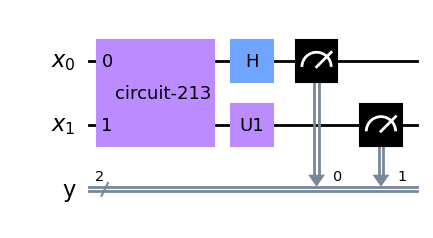

In [56]:
## To calculate P(ab/xy=11) we measure Alice's qubit on X basis and Bob's qubit on (X-Z)/sqrt(2) basis
q = QuantumRegister(2, name="x")

# Allocating 2 bits
c = ClassicalRegister(2, name="y")

# We build a quantum circuit with both registers.
# By default, everything is initialized to 0 and to |0>
qc = QuantumCircuit(q,c)
qc.append(bell_circuit,[q[0], q[1]])
qc.h(0)
qc.append(U1,[q[1]])
# Mesure of all of register q, storing results in c.
# This is still part of the circuit
qc.measure(q, c)
qc.draw()

In [57]:
from qiskit import BasicAer, execute
# To run the circuit, we initialize a backend
backend = BasicAer.get_backend('qasm_simulator')

# Then performs several runs of the circuit using this backend. Here we ask for 1024 runs.
job = execute(qc, backend, shots=N)

# To retrieve the results -- note how we only get values for the single bit-register
res = dict(job.result().get_counts(qc))

res
counts = job.result().get_counts()
total_shots = sum(counts.values())  # Calculate the total number of shots

# Initialize a dictionary to store the probabilities
P11 = {}

# Calculate the probability for each outcome
for outcome, count in counts.items():
    probability = count / total_shots
    P11[outcome] = probability
P11



{'01': 0.42575, '10': 0.4275, '00': 0.07525, '11': 0.0715}

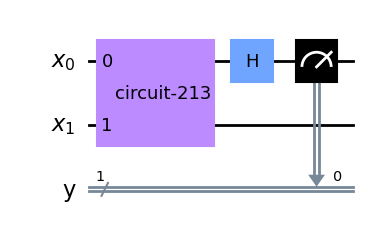

In [58]:
## ## To calculate P(a/1) we measure Alice's qubit on X basis
q = QuantumRegister(2, name="x")

# Allocating 2 bits
c = ClassicalRegister(1, name="y")

# We build a quantum circuit with both registers.
# By default, everything is initialized to 0 and to |0>
qc = QuantumCircuit(q,c)
qc.append(bell_circuit,[q[0], q[1]])
qc.h(0)
#qc.append(U1,[q[1]])
# Mesure of all of register q, storing results in c.
# This is still part of the circuit
qc.measure(q[0], c)
qc.draw()

In [59]:
from qiskit import BasicAer, execute
# To run the circuit, we initialize a backend
backend = BasicAer.get_backend('qasm_simulator')

# Then performs several runs of the circuit using this backend. Here we ask for 1024 runs.
job = execute(qc, backend, shots=N)

# To retrieve the results -- note how we only get values for the single bit-register
res = dict(job.result().get_counts(qc))

res
counts = job.result().get_counts()
total_shots = sum(counts.values())  # Calculate the total number of shots

# Initialize a dictionary to store the probabilities
Pa1 = {}

# Calculate the probability for each outcome
for outcome, count in counts.items():
    probability = count / total_shots
    Pa1[outcome] = probability
Pa1

{'1': 0.502125, '0': 0.497875}

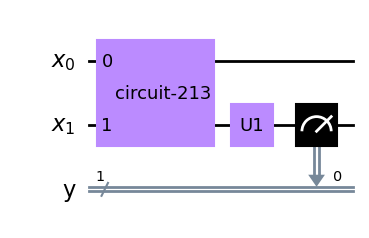

In [60]:
## ## To calculate P(b/1) we measure Bob's qubit on X-Z/sqrt(2) basis
q = QuantumRegister(2, name="x")

# Allocating 2 bits
c = ClassicalRegister(1, name="y")

# We build a quantum circuit with both registers.
# By default, everything is initialized to 0 and to |0>
qc = QuantumCircuit(q,c)
qc.append(bell_circuit,[q[0], q[1]])

qc.append(U1,[q[1]])
# Mesure of all of register q, storing results in c.
# This is still part of the circuit
qc.measure(q[1], c)
qc.draw()

In [61]:
from qiskit import BasicAer, execute
# To run the circuit, we initialize a backend
backend = BasicAer.get_backend('qasm_simulator')

# Then performs several runs of the circuit using this backend. Here we ask for 1024 runs.
job = execute(qc, backend, shots=N)

# To retrieve the results -- note how we only get values for the single bit-register
res = dict(job.result().get_counts(qc))

res
counts = job.result().get_counts()
total_shots = sum(counts.values())  # Calculate the total number of shots

# Initialize a dictionary to store the probabilities
Pb1 = {}

# Calculate the probability for each outcome
for outcome, count in counts.items():
    probability = count / total_shots
    Pb1[outcome] = probability
Pb1

{'0': 0.500875, '1': 0.499125}

In [62]:
##ep_ax = |P(a=1/xy)-P(a=1/xy')|
#ep_a0=[]
ep_a0.append(abs(P00['01']+P00['11'] - (P01['01']+P01['11']))) # |P(a=1/00) - P(a=1/01)|
#ep_a1=[]
ep_a1.append(abs(P10['01']+P10['11'] - (P11['01']+P11['11']))) # |P(a=1/10) - P(a=1/11)|

##ep_by = P(b=1/xy)-P(b=1/x'y)
#ep_b0=[]
ep_b0.append(abs(P00['10']+P00['11'] - (P10['10']+P10['11']))) # |P(b=1/00) - P(b=1/10)|
#ep_b1=[]
ep_b1.append(abs(P01['10']+P01['11'] - (P11['10']+P11['11']))) # |P(b=1/01) - P(b=1/11)|

print("ep_a0 = |P(a=1/00) - P(a=1/01)|:", ep_a0)
print("ep_a1 = |P(a=1/10) - P(a=1/11)|:", ep_a1)
print("ep_b0 = |P(b=1/00) - P(b=1/10)|:", ep_b0)
print("ep_b1 = |P(b=1/01) - P(b=1/11)|:", ep_b1)

ep_a0 = |P(a=1/00) - P(a=1/01)|: [0.009750000000000036, 0.016625, 0.01599999999999996]
ep_a1 = |P(a=1/10) - P(a=1/11)|: [0.00649999999999995, 0.010000000000000009, 0.004374999999999962]
ep_b0 = |P(b=1/00) - P(b=1/10)|: [0.002875000000000072, 0.018500000000000016, 0.010499999999999954]
ep_b1 = |P(b=1/01) - P(b=1/11)|: [0.0025000000000000577, 0.005125000000000046, 0.0014999999999999458]


In [63]:
##ep_noise statistical noise
#ep_a0_snoise=[]
#ep_a1_snoise=[]
#ep_b0_snoise=[]
#ep_b1_snoise=[]

ep_a0_snoise.append(abs(0.5 - Pa0['0']))
ep_a1_snoise.append(abs(0.5 - Pa1['0']))
ep_b0_snoise.append(abs(0.5 - Pb0['0'])) 
ep_b1_snoise.append(abs(0.5 - Pb1['0'])) 

print("ep_a0_snoise = |P(a=0/0) - 1/2|:", ep_a0_snoise)
print("ep_a1_snoise = |P(a=0/1) - 1/2|:", ep_a1_snoise)
print("ep_b0_snoise = |P(b=0/0) - 1/2|:", ep_b0_snoise)
print("ep_b1_snoise = |P(b=0/1) - 1/2|:", ep_b1_snoise)

ep_a0_snoise = |P(a=0/0) - 1/2|: [0.0016249999999999876, 0.00649999999999995, 0.005249999999999977]
ep_a1_snoise = |P(a=0/1) - 1/2|: [0.0063750000000000195, 0.00012500000000004174, 0.002124999999999988]
ep_b0_snoise = |P(b=0/0) - 1/2|: [0.005624999999999991, 0.00412499999999999, 0.0037499999999999756]
ep_b1_snoise = |P(b=0/1) - 1/2|: [0.0004999999999999449, 0.00024999999999997247, 0.0008749999999999591]
